In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
mpl.rc('xtick', labelsize=20)
mpl.rc('ytick', labelsize=20)
mpl.rc('axes', labelsize=25)
out_pre = "/Users/weilu/Dropbox/GlpG_paper_2018/natureCommunication/revision/revisedmanuscriptfiles/figures/"

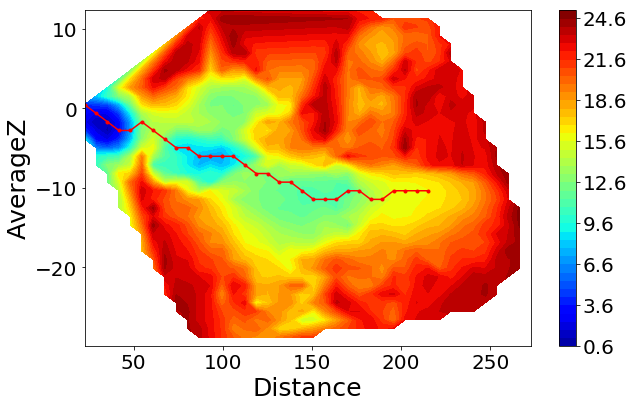

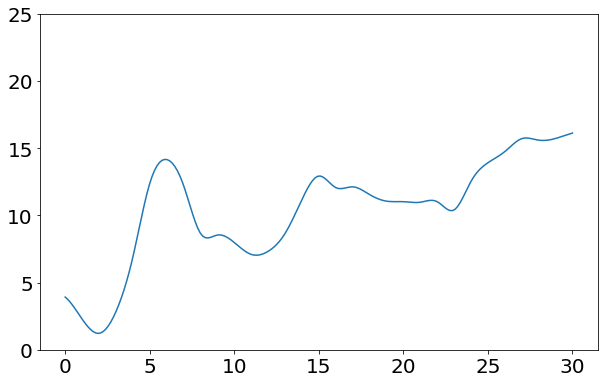

In [10]:
pre = "/Volumes/Wei_backup/GlpG/may_2018_back/03_week"
temp = 370
location = pre + "/second_start_extended_combined_2/_280-350/2d_zAverage_dis/more_bins/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin,x_on_path = shortest_path_2(location2, start=(18, 30), end=(28,0),save=False, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

In [30]:
perturbation_table = {3:"Decrease 10% $V_{AMH-Go}$",
                      4:"Increase 10% $V_{AMH-Go}$",
                        5:"Decrease 10% $V_{helix-pair}$",
                     6:"Increase 10% $V_{helix-pair}$",
                     7:"Decrease 20% $V_{burial}$",
                     8:"Increase 20% $V_{burial}$",
                     9:"Decrease 20% $V_{orientation}$",
                     10:"Increase 20% $V_{orientation}$"}
all_f = {}
all_location = {}

for i in perturbation_table:
#     print(i,perturbation_table[i])
    location_i = location + f"perturbation-{i}-pmf-{temp}.dat"
    path, f = plot_shortest_path(location_i, path_origin, save=False, 
                               xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res,
                              xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax, plot2d=False)
#     all_path[i] = path_origin
    all_f[i] = f
    all_location[i] = location_i

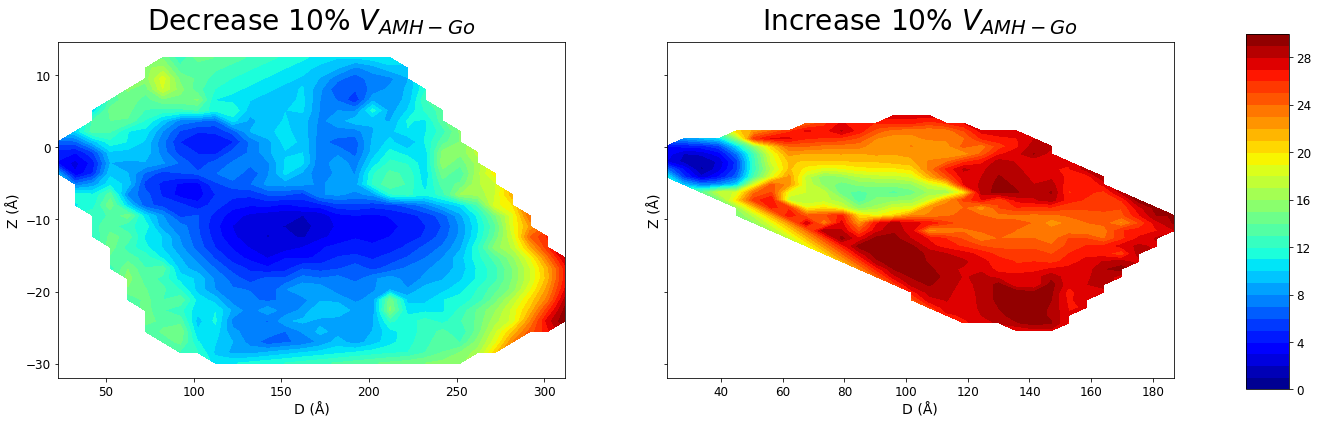

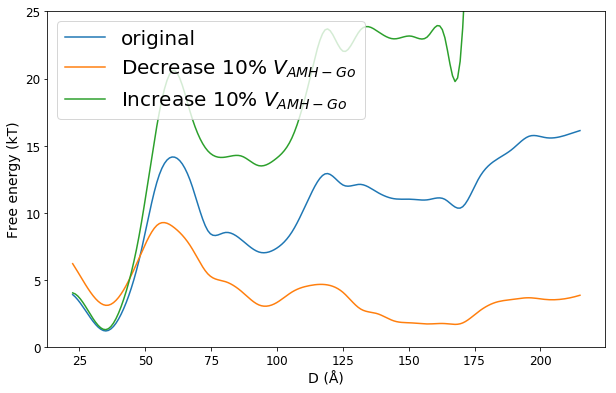

In [31]:
i = 3
j = 4
title = "Go"
plot2d_side_by_side(all_location[i], all_location[j], title1=perturbation_table[i], title2=perturbation_table[j]
                   , xlabel="D (Å)", ylabel="Z (Å)")
plt.savefig(out_pre + "perturb_energy_term/"+f"{title}_compare.png", dpi=300)
# plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_compare.png", dpi=300)
plt.figure()
x = np.array(x_on_path)
x_smooth = np.linspace(x.min(), x.max(), 200)
spl = scipy.interpolate.interp1d(x, f_origin, kind="cubic")

plt.plot(x_smooth, spl(x_smooth), label="original")

spl = scipy.interpolate.interp1d(x, all_f[i], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[i])

spl = scipy.interpolate.interp1d(x, all_f[j], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[j])
plt.ylim([0,25])
plt.legend(prop={'size': 20})
# plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_1d.png", dpi=300)
plt.xlabel("D (Å)")
plt.ylabel("Free energy (kT)")
plt.savefig(out_pre + "perturb_energy_term/"+f"{title}_1d.png", dpi=300)

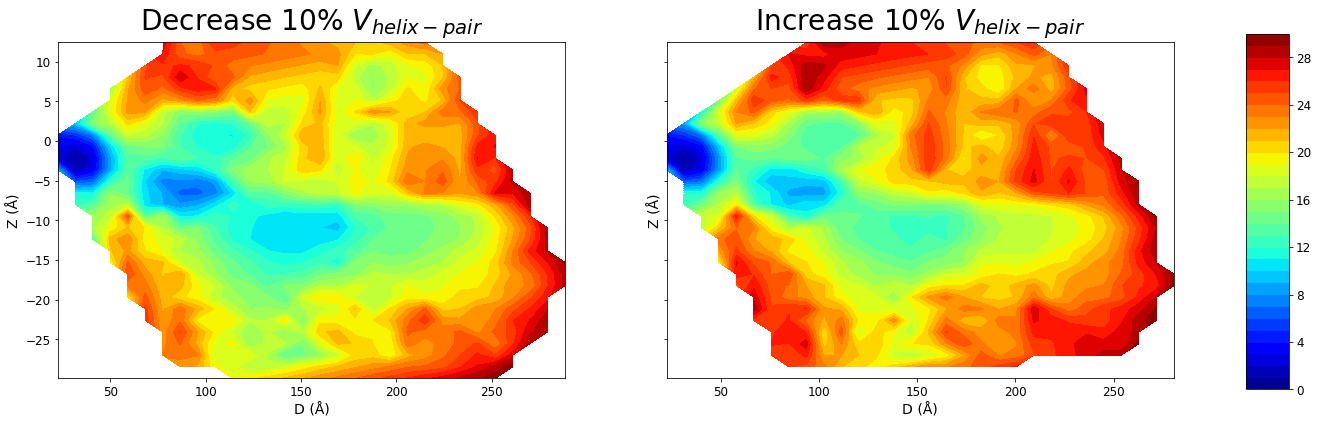

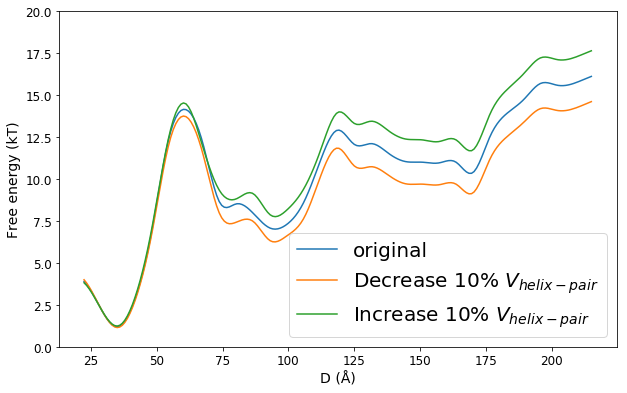

In [32]:
i = 5
j = 6
title = "Lipid"
plot2d_side_by_side(all_location[i], all_location[j], title1=perturbation_table[i], title2=perturbation_table[j]
                   , xlabel="D (Å)", ylabel="Z (Å)")
plt.savefig(out_pre + "perturb_energy_term/"+f"{title}_compare.png", dpi=300)
# plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_compare.png", dpi=300)
plt.figure()
x = np.array(x_on_path)
x_smooth = np.linspace(x.min(), x.max(), 200)
spl = scipy.interpolate.interp1d(x, f_origin, kind="cubic")

plt.plot(x_smooth, spl(x_smooth), label="original")

spl = scipy.interpolate.interp1d(x, all_f[i], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[i])

spl = scipy.interpolate.interp1d(x, all_f[j], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[j])
plt.ylim([0,20])
plt.legend(prop={'size': 20})
# plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_1d.png", dpi=300)
plt.xlabel("D (Å)")
plt.ylabel("Free energy (kT)")
plt.savefig(out_pre + "perturb_energy_term/"+f"{title}_1d.png", dpi=300)

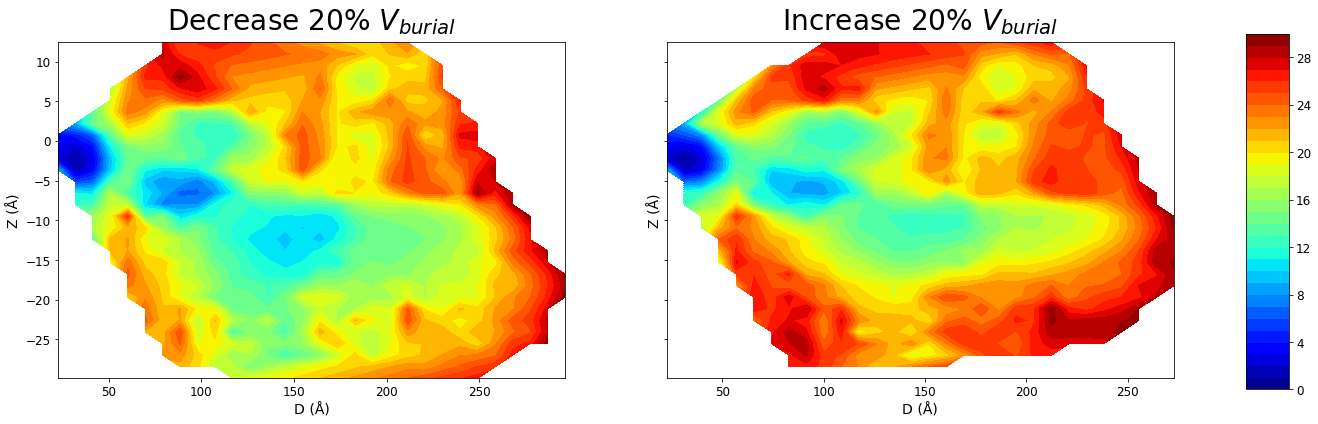

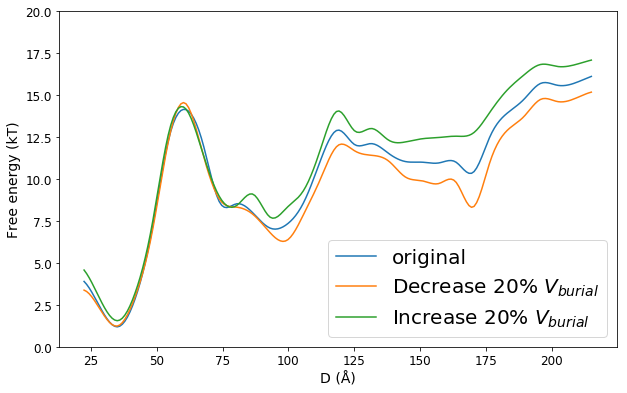

In [33]:
i = 7
j = 8
title = "Membrane"
plot2d_side_by_side(all_location[i], all_location[j], title1=perturbation_table[i], title2=perturbation_table[j]
                   , xlabel="D (Å)", ylabel="Z (Å)")
plt.savefig(out_pre + "perturb_energy_term/"+f"{title}_compare.png", dpi=300)
# plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_compare.png", dpi=300)
plt.figure()
x = np.array(x_on_path)
x_smooth = np.linspace(x.min(), x.max(), 200)
spl = scipy.interpolate.interp1d(x, f_origin, kind="cubic")

plt.plot(x_smooth, spl(x_smooth), label="original")

spl = scipy.interpolate.interp1d(x, all_f[i], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[i])

spl = scipy.interpolate.interp1d(x, all_f[j], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[j])
plt.ylim([0,20])
plt.legend(prop={'size': 20})
# plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_1d.png", dpi=300)
plt.xlabel("D (Å)")
plt.ylabel("Free energy (kT)")
plt.savefig(out_pre + "perturb_energy_term/"+f"{title}_1d.png", dpi=300)

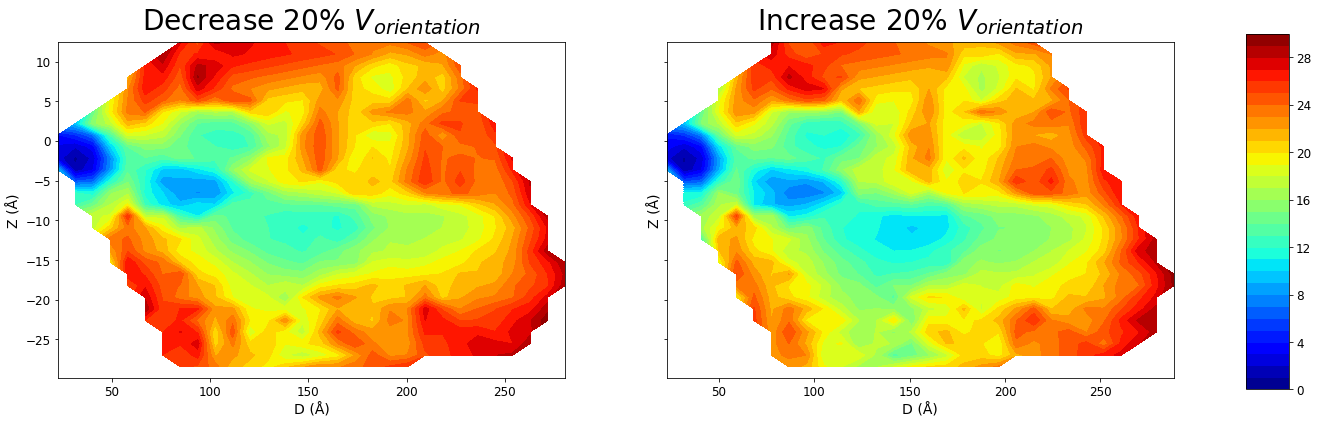

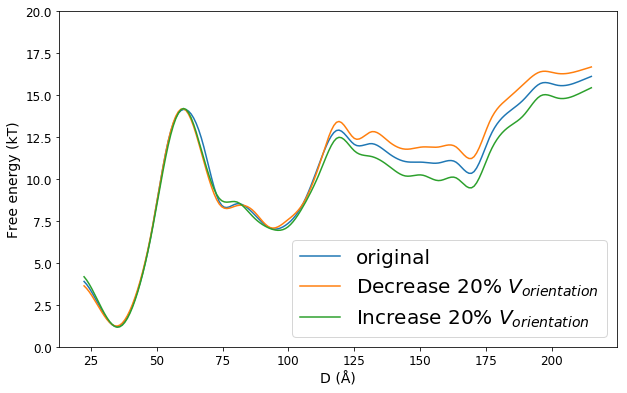

In [34]:
i = 9
j = 10
title = "Rg"
plot2d_side_by_side(all_location[i], all_location[j], title1=perturbation_table[i], title2=perturbation_table[j]
                   , xlabel="D (Å)", ylabel="Z (Å)")
plt.savefig(out_pre + "perturb_energy_term/"+f"{title}_compare.png", dpi=300)
# plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_compare.png", dpi=300)
plt.figure()
x = np.array(x_on_path)
x_smooth = np.linspace(x.min(), x.max(), 200)
spl = scipy.interpolate.interp1d(x, f_origin, kind="cubic")

plt.plot(x_smooth, spl(x_smooth), label="original")

spl = scipy.interpolate.interp1d(x, all_f[i], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[i])

spl = scipy.interpolate.interp1d(x, all_f[j], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[j])
plt.ylim([0,20])
plt.legend(prop={'size': 20})
# plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_1d.png", dpi=300)
plt.xlabel("D (Å)")
plt.ylabel("Free energy (kT)")
plt.savefig(out_pre + "perturb_energy_term/"+f"{title}_1d.png", dpi=300)

# High force

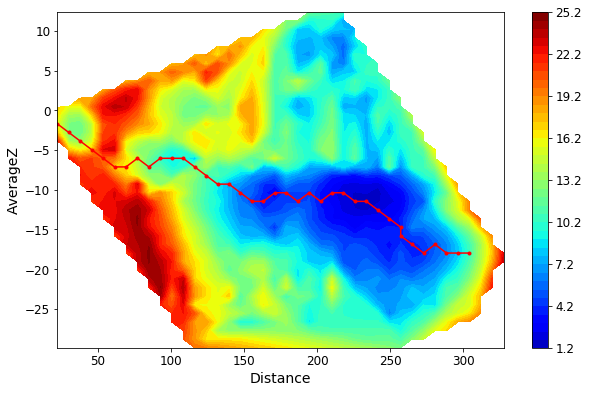

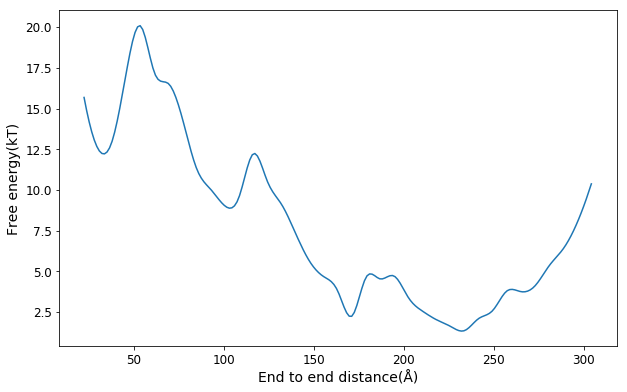

In [148]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/second_start_extended_combined_2/_280-350/2d_zAverage_dis/higer_force_0.2/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, title="high_force_AverageZ_Dis", start=(11, 36), end=(26,0),save=False, plot1d=2, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

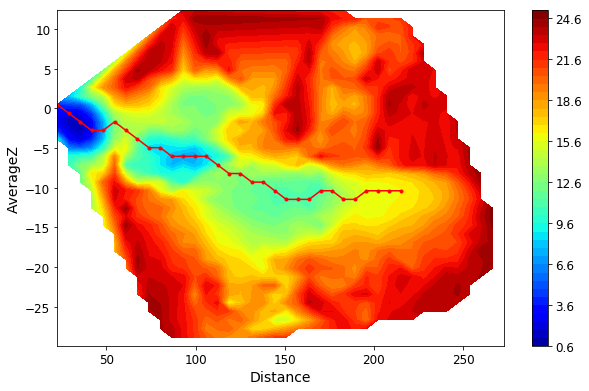

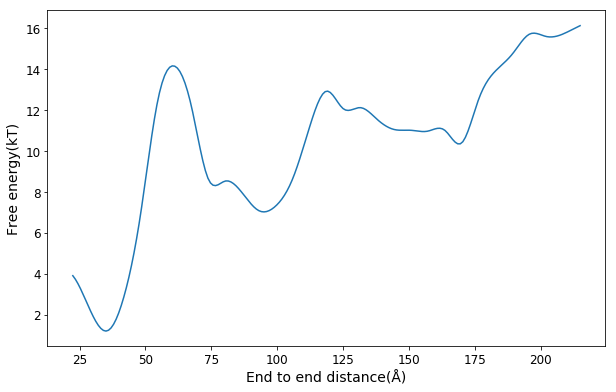

In [149]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/second_start_extended_combined_2/_280-350/2d_zAverage_dis/more_bins/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(18, 30), end=(28,0),save=False, plot1d=2,xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

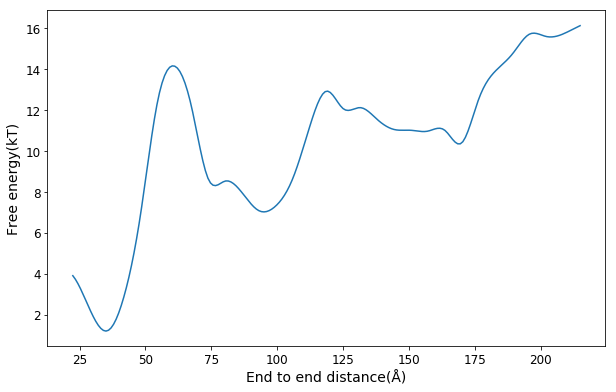

In [67]:
data = np.loadtxt(location2)
zmin = 0
z =3
xi, yi, zi = getxyz(data, zmin=zmin, zmax=zmax,res=res, z=z)
# V = ma.masked_array(zi, zi>40)
# zi = np.where(np.isnan(zi), 1e6, zi)
f_on_path = [zi[tuple(p)] for p in reversed(path_origin)]
distance_on_path = [xi[tuple(p)[1]] for p in reversed(path_origin)]
distance_on_path = np.array(distance_on_path)
x = np.arange(len(distance_on_path))
x_smooth = np.linspace(distance_on_path.min(), distance_on_path.max(), 200)
spl1 = scipy.interpolate.interp1d(distance_on_path, f_origin, kind="cubic")
plt.plot(x_smooth, spl1(x_smooth))
plt.xlabel("End to end distance(Å)")
plt.ylabel("Free energy(kT)")
# plt.ylim([0,20])
plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/freeEnergy_Distance.png")

# Enhance Go term

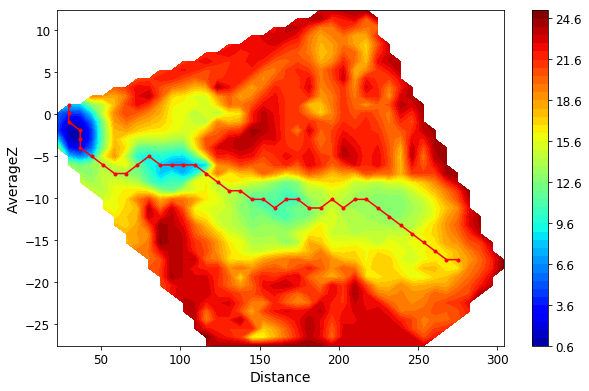

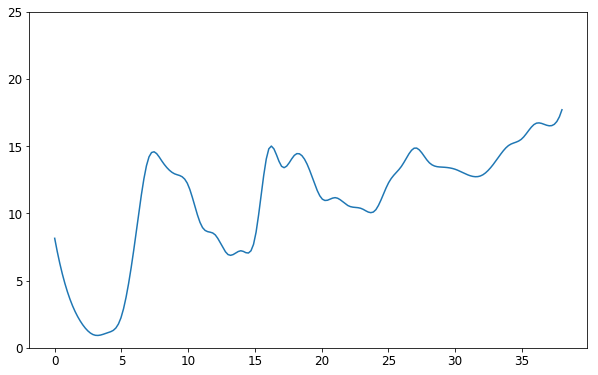

In [14]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/enhance_go/_280-350/2d_zAverage_dis/force_0.18/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(10, 35), end=(28,1),save=False, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

In [15]:
perturbation_table = {3:"Decrease 10% Lipid",
                      4:"Increase 10% Lipid",
                        5:"Decrease 20% Lipid",
                     6:"Increase 20% Lipid",
                     7:"Decrease Membrane",
                     8:"Increase Membrane",
                     9:"Decrease Rg",
                     10:"Increase Rg"}
all_f = {}
all_location = {}

for i in perturbation_table:
#     print(i,perturbation_table[i])
    location_i = location + f"perturbation-{i}-pmf-{temp}.dat"
    path, f = plot_shortest_path(location_i, path_origin, save=False, 
                               xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res,
                              xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax, plot2d=False)
#     all_path[i] = path_origin
    all_f[i] = f
    all_location[i] = location_i

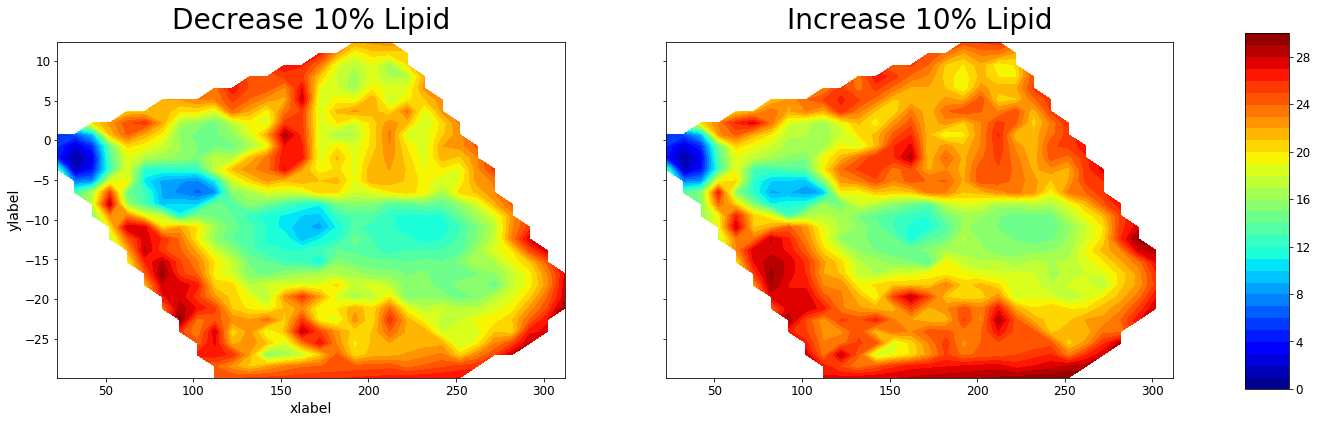

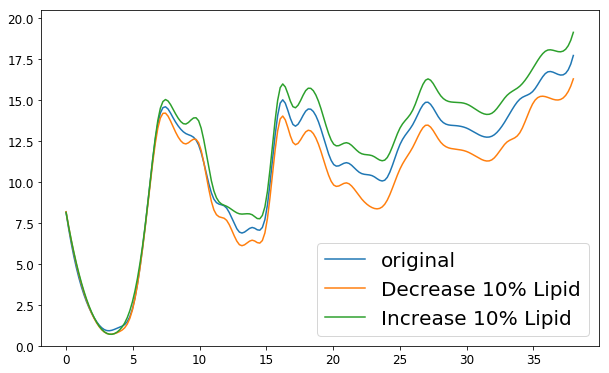

In [16]:
i = 3
j = 4
title = "Lipid"
plot2d_side_by_side(all_location[i], all_location[j], title1=perturbation_table[i], title2=perturbation_table[j])
# plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_compare.png", dpi=300)
plt.figure()
x = np.arange(len(f_origin))
x_smooth = np.linspace(x.min(), x.max(), 200)
spl = scipy.interpolate.interp1d(x, f_origin, kind="cubic")

plt.plot(x_smooth, spl(x_smooth), label="original")

spl = scipy.interpolate.interp1d(x, all_f[i], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[i])

spl = scipy.interpolate.interp1d(x, all_f[j], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[j])
plt.ylim([0,20.5])
plt.legend(prop={'size': 20})
# plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_1d.png", dpi=300)

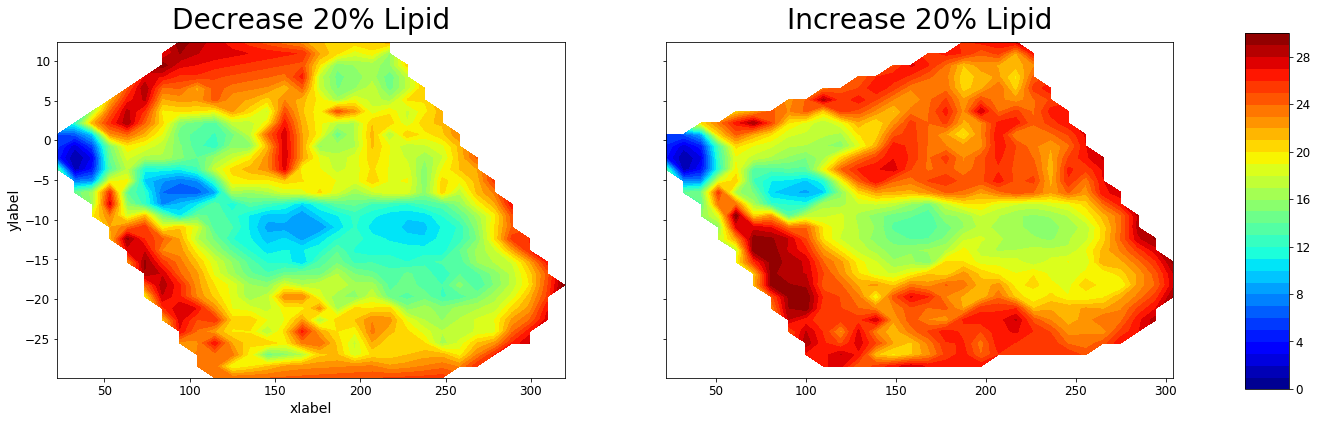

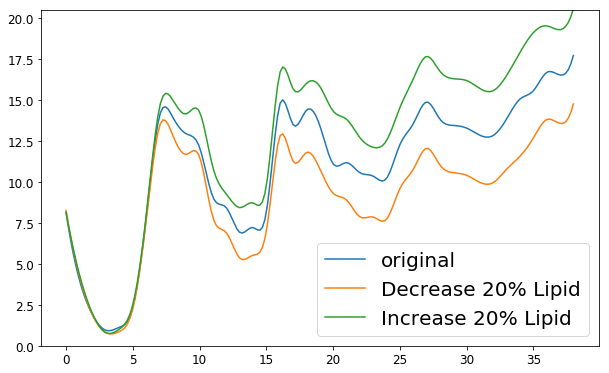

In [17]:
i = 5
j = 6
title = "Lipid"
plot2d_side_by_side(all_location[i], all_location[j], title1=perturbation_table[i], title2=perturbation_table[j])
# plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_compare.png", dpi=300)
plt.figure()
x = np.arange(len(f_origin))
x_smooth = np.linspace(x.min(), x.max(), 200)
spl = scipy.interpolate.interp1d(x, f_origin, kind="cubic")

plt.plot(x_smooth, spl(x_smooth), label="original")

spl = scipy.interpolate.interp1d(x, all_f[i], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[i])

spl = scipy.interpolate.interp1d(x, all_f[j], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[j])
plt.ylim([0,20.5])
plt.legend(prop={'size': 20})
# plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_1d.png", dpi=300)

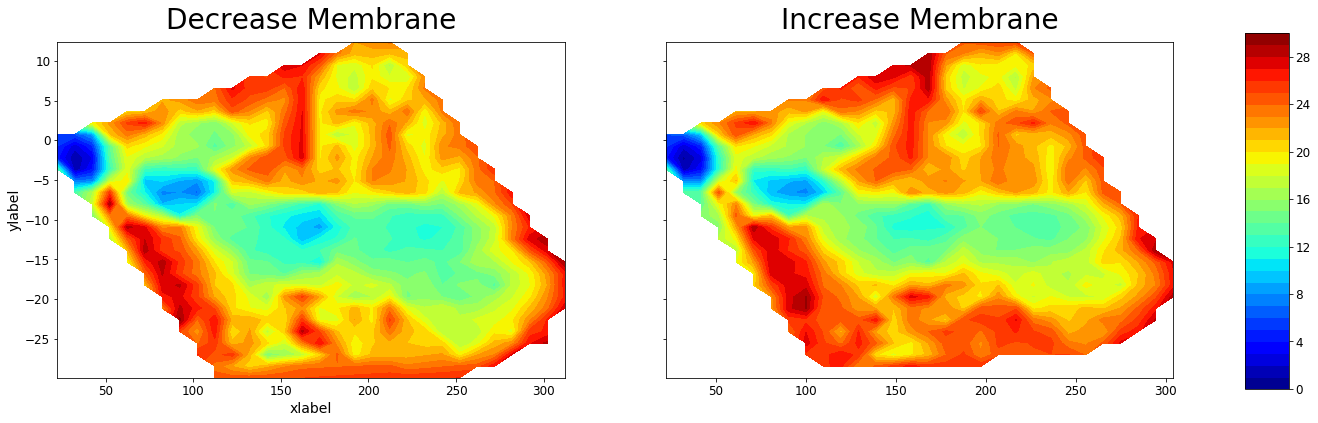

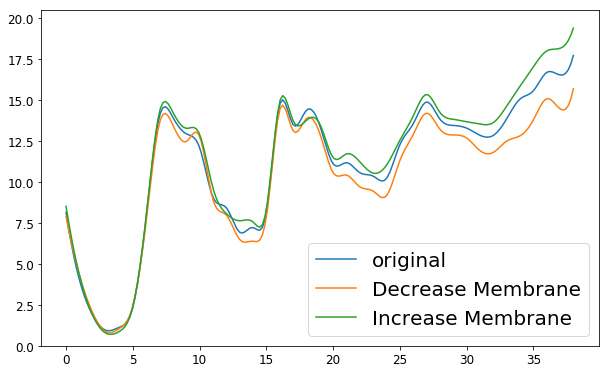

In [18]:
i = 7
j = 8
title = "Membrane"
plot2d_side_by_side(all_location[i], all_location[j], title1=perturbation_table[i], title2=perturbation_table[j])
# plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_compare.png", dpi=300)
plt.figure()
x = np.arange(len(f_origin))
x_smooth = np.linspace(x.min(), x.max(), 200)
spl = scipy.interpolate.interp1d(x, f_origin, kind="cubic")

plt.plot(x_smooth, spl(x_smooth), label="original")

spl = scipy.interpolate.interp1d(x, all_f[i], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[i])

spl = scipy.interpolate.interp1d(x, all_f[j], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[j])
plt.ylim([0,20.5])
plt.legend(prop={'size': 20})
# plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_1d.png", dpi=300)